## **Data Collection**



**Loading Data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Amazon Sales data.csv')

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


## **DATA PREPROCESSING**



**Data Cleaning**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


**Extracting Date into Year,Month,Day**

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], utc=True)

# Extract relevant components
data['Order year'] = data['Order Date'].dt.year
data['Order month'] = data['Order Date'].dt.month
data['Order day'] = data['Order Date'].dt.day
data['Order Year-Month'] = data['Order Date'].dt.to_period('M')

<ipython-input-10-9f13fcd26b03>:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Order Year-Month'] = data['Order Date'].dt.to_period('M')


In [ ]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'], utc=True)

# Extract relevant components
data['Ship year'] = data['Ship Date'].dt.year
data['Ship month'] = data['Ship Date'].dt.month
data['Ship day'] = data['Ship Date'].dt.day

In [ ]:
#Removing Columns
data = data.drop('Order Date',axis=1)
data = data.drop('Ship Date',axis=1)

In [ ]:
data.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order ID,int64
Units Sold,int64
Unit Price,float64
Unit Cost,float64
Total Revenue,float64


In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order month,Order day,Order Year-Month,Ship year,Ship month,Ship day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,2010-05,2010,6,27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,2012-08,2012,9,15
2,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2014-05,2014,5,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,2014-06,2014,7,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,2013-02,2013,2,6


**Classified into Categorical and Numerical Columns**

In [ ]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object' or data[column].dtype == 'period[M]' :
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['Order ID', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Order year', 'Order month', 'Order day', 'Ship year', 'Ship month', 'Ship day']
categorical Columns : ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Year-Month']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   Region            100 non-null    object   
 1   Country           100 non-null    object   
 2   Item Type         100 non-null    object   
 3   Sales Channel     100 non-null    object   
 4   Order Priority    100 non-null    object   
 5   Order ID          100 non-null    int64    
 6   Units Sold        100 non-null    int64    
 7   Unit Price        100 non-null    float64  
 8   Unit Cost         100 non-null    float64  
 9   Total Revenue     100 non-null    float64  
 10  Total Cost        100 non-null    float64  
 11  Total Profit      100 non-null    float64  
 12  Order year        100 non-null    int32    
 13  Order month       100 non-null    int32    
 14  Order day         100 non-null    int32    
 15  Order Year-Month  100 non-null    period[M]
 16  Ship year

**Outlier Detection and Removal**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def boxplot(str,column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column} {str}')
    plt.show()

Before Outlier Removing:  Order ID


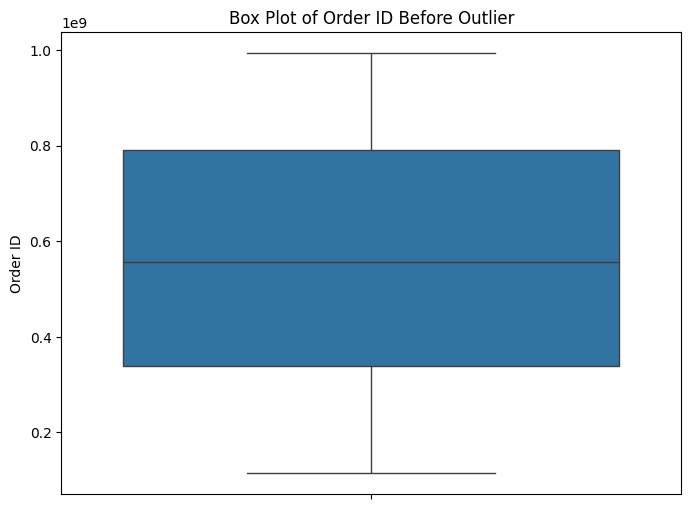

After Outlier Removing:  Order ID


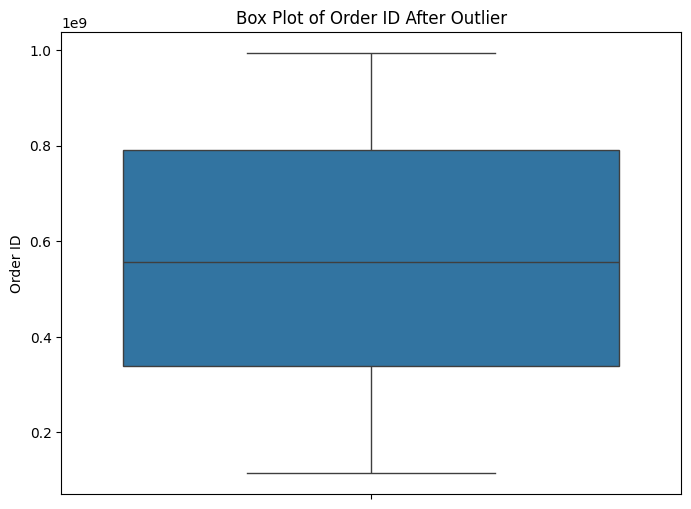

Before Outlier Removing:  Units Sold


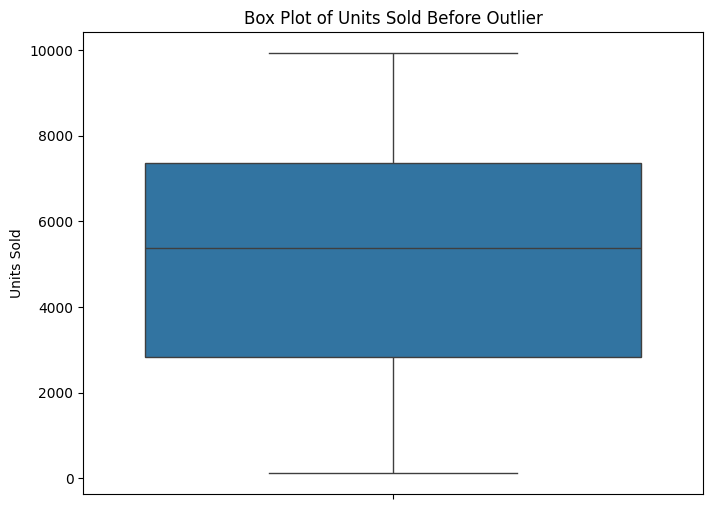

After Outlier Removing:  Units Sold


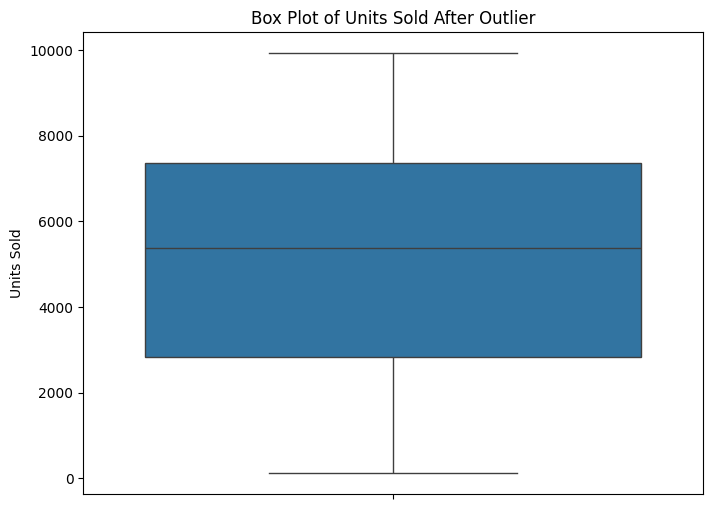

Before Outlier Removing:  Unit Price


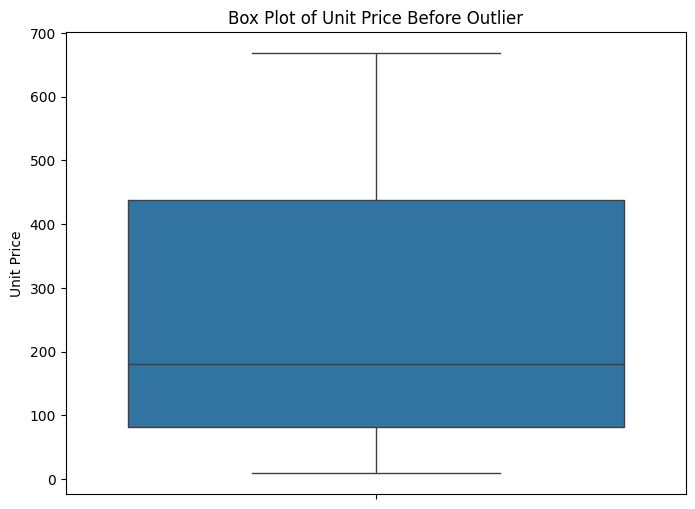

After Outlier Removing:  Unit Price


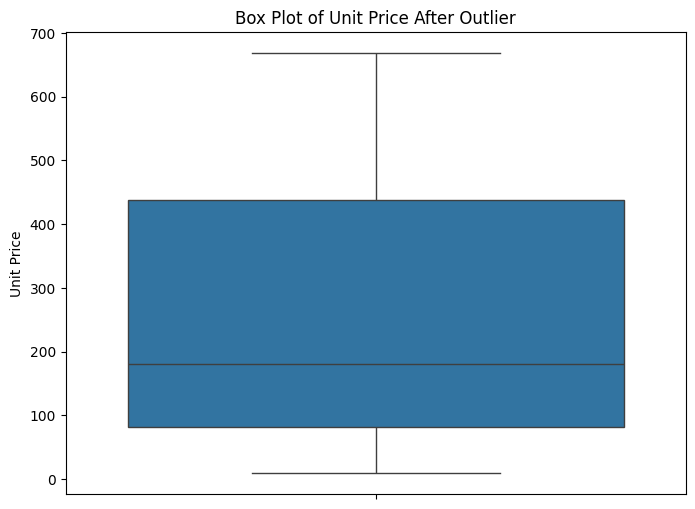

Before Outlier Removing:  Unit Cost


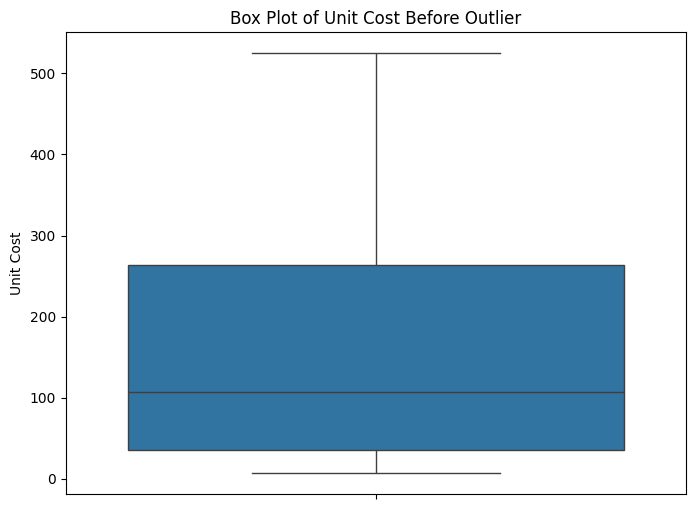

After Outlier Removing:  Unit Cost


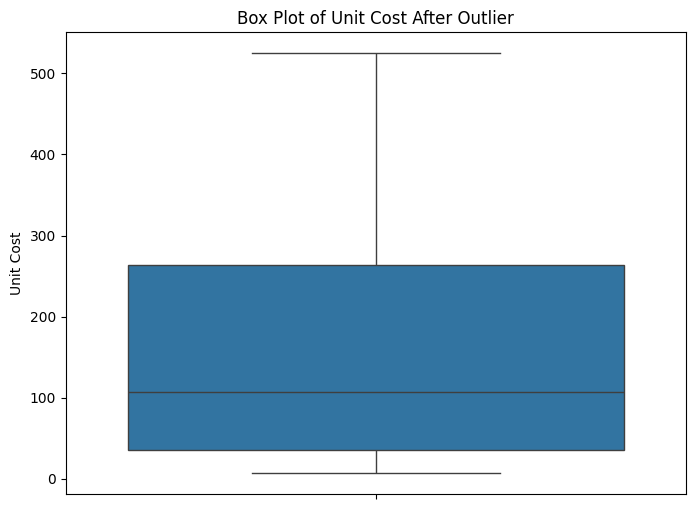

Before Outlier Removing:  Total Revenue


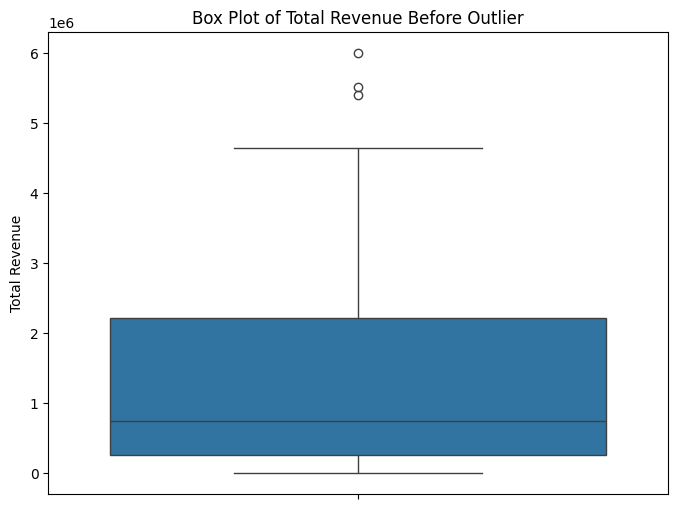

After Outlier Removing:  Total Revenue


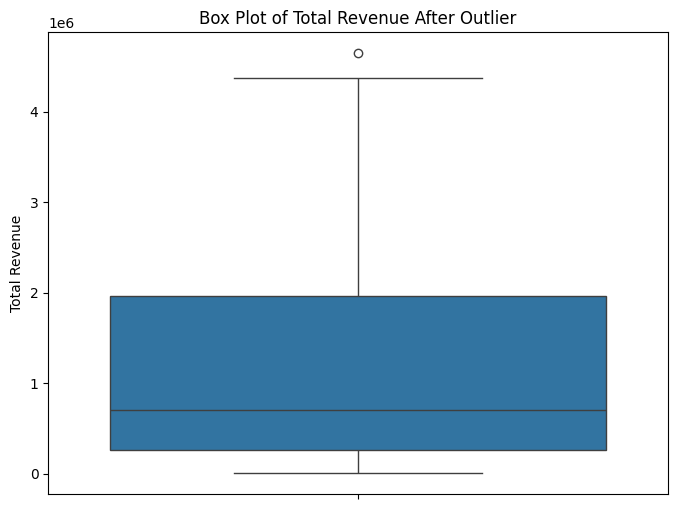

Before Outlier Removing:  Total Cost


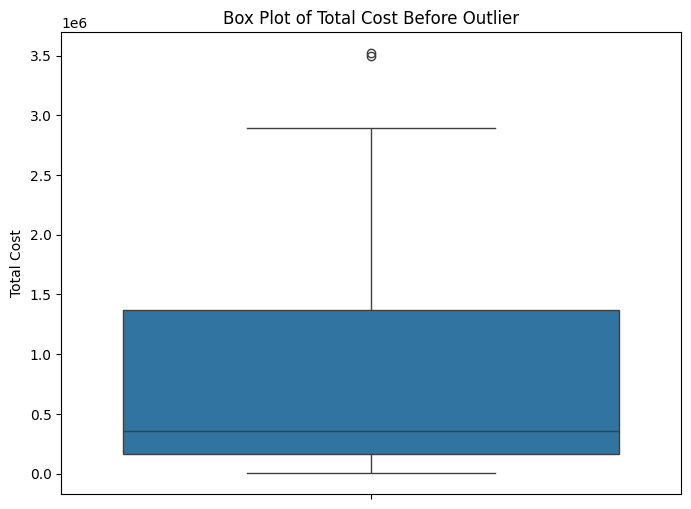

After Outlier Removing:  Total Cost


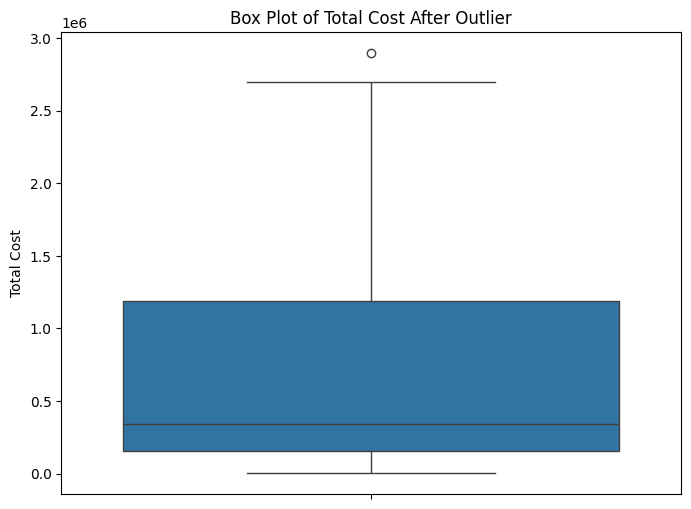

Before Outlier Removing:  Total Profit


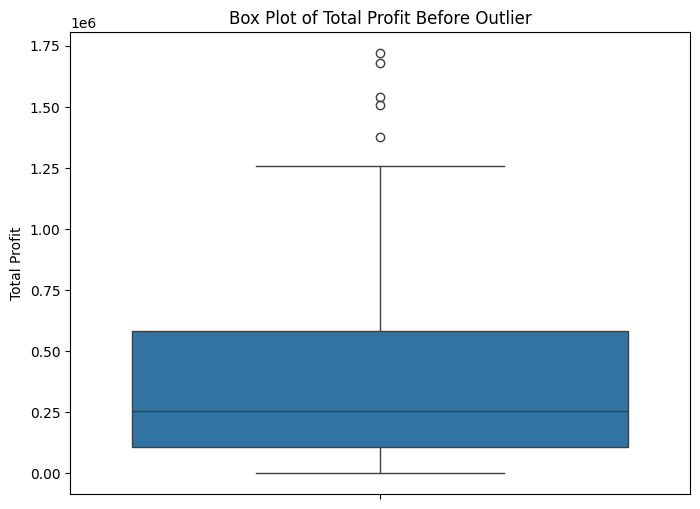

After Outlier Removing:  Total Profit


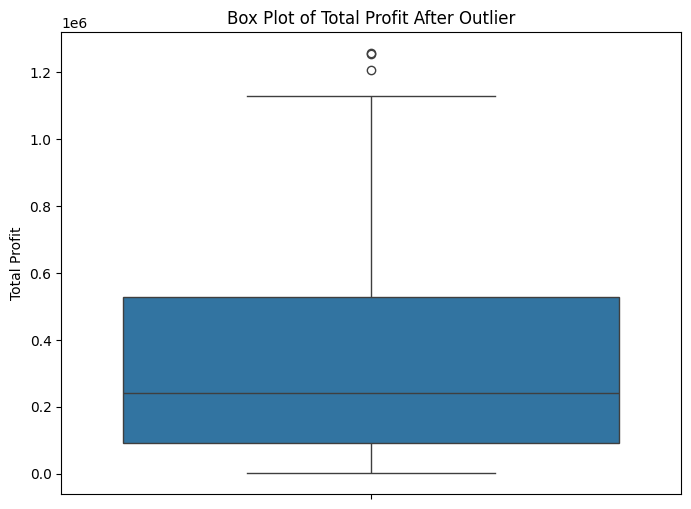

Before Outlier Removing:  Order year


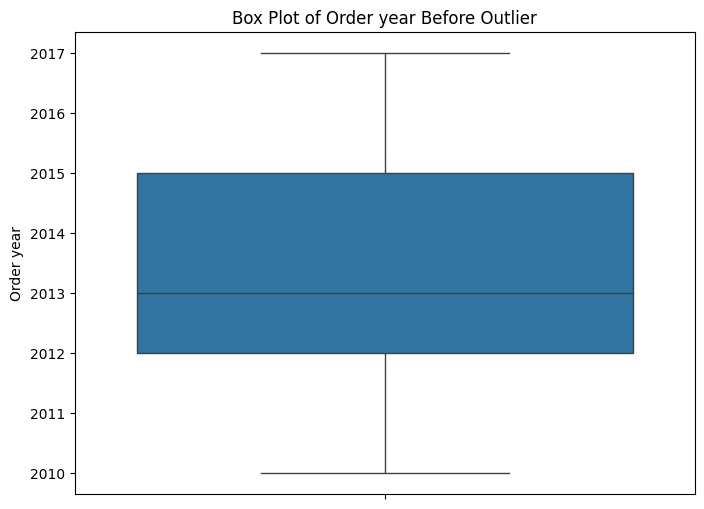

After Outlier Removing:  Order year


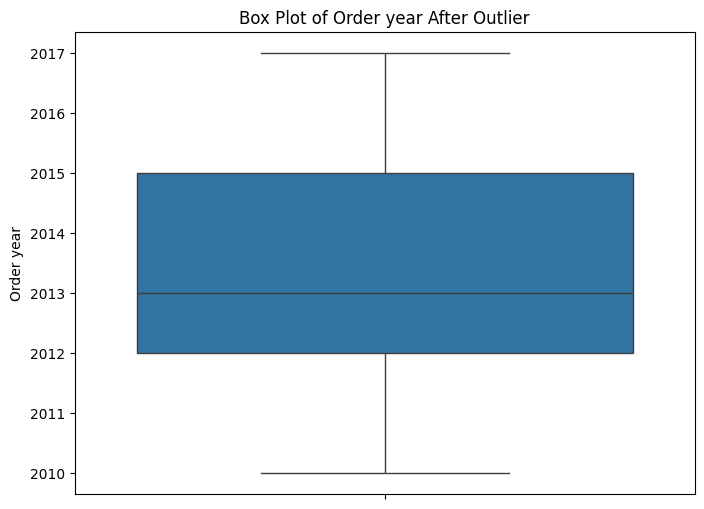

Before Outlier Removing:  Order month


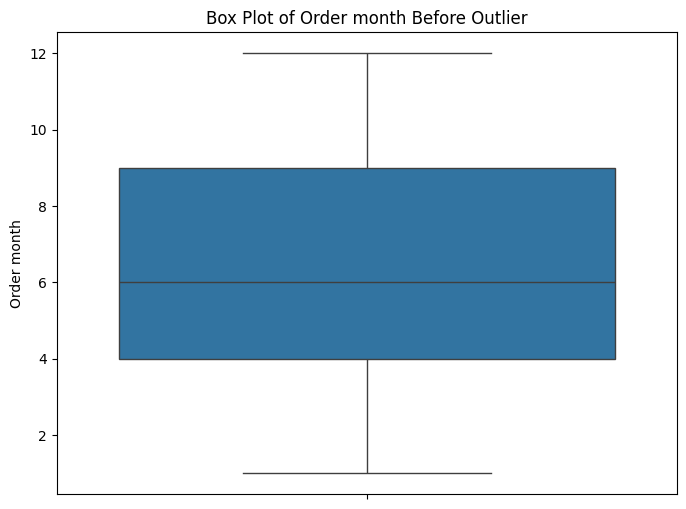

After Outlier Removing:  Order month


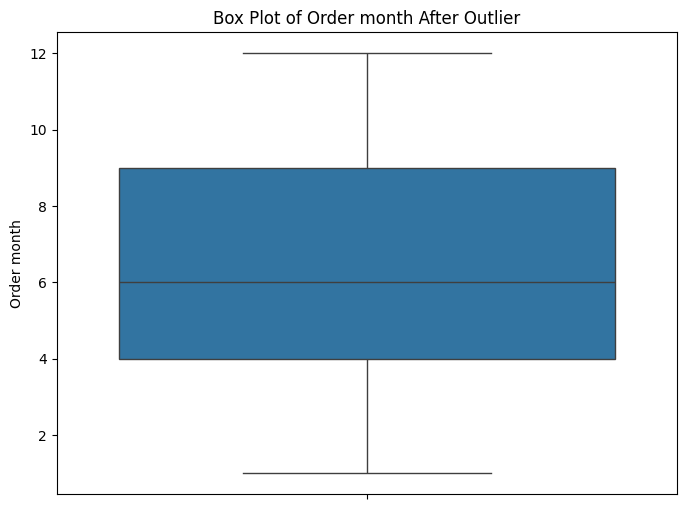

Before Outlier Removing:  Order day


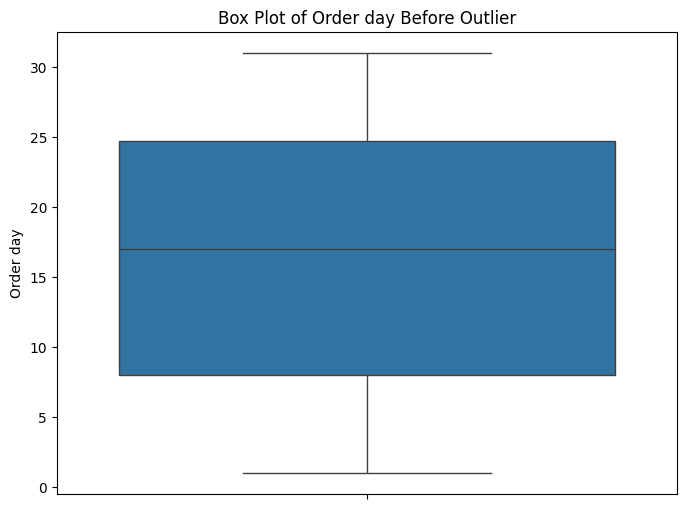

After Outlier Removing:  Order day


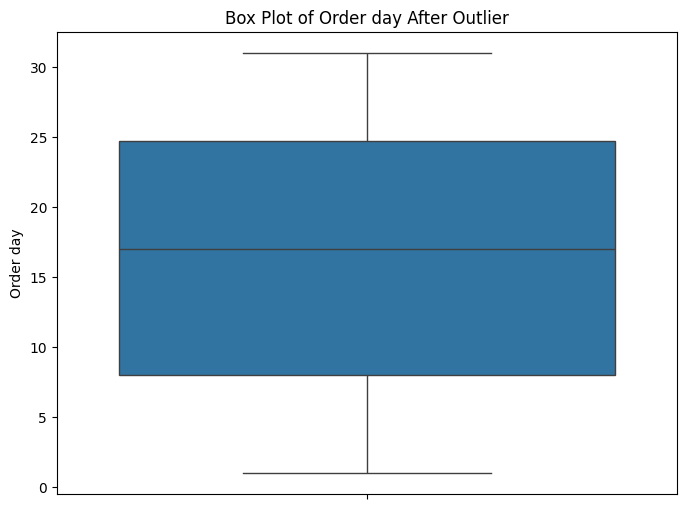

Before Outlier Removing:  Ship year


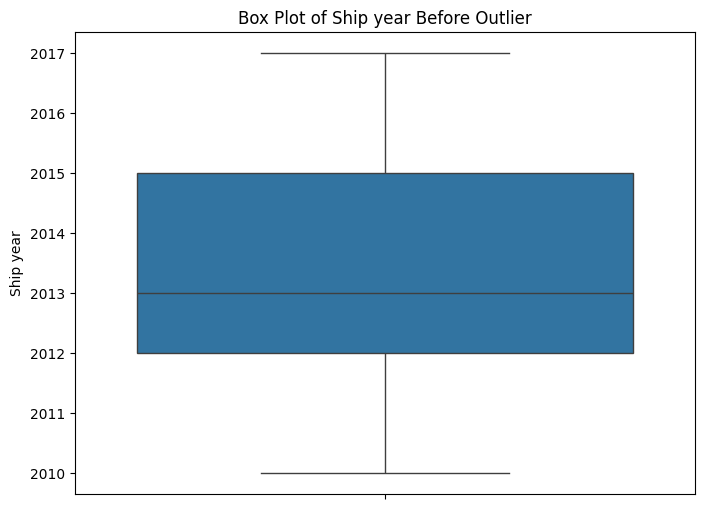

After Outlier Removing:  Ship year


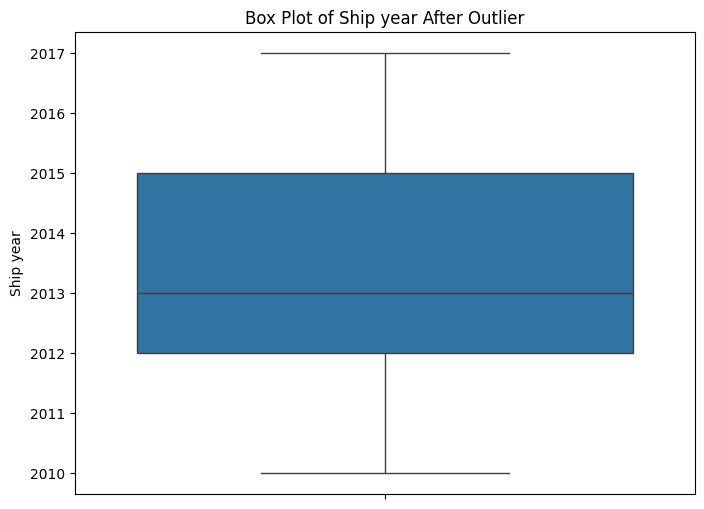

Before Outlier Removing:  Ship month


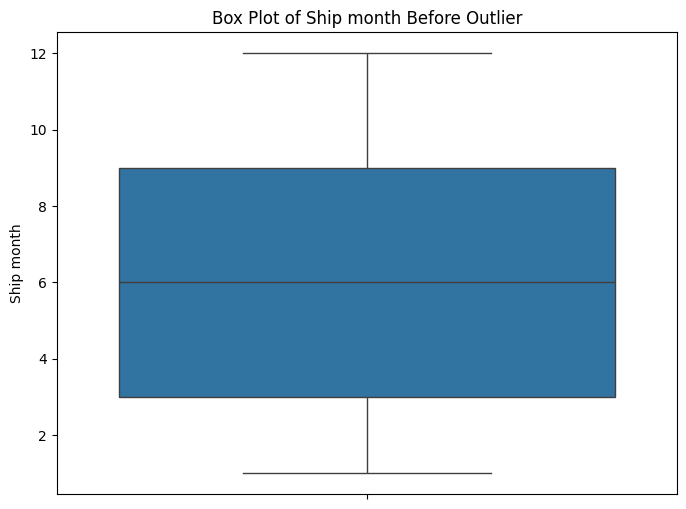

After Outlier Removing:  Ship month


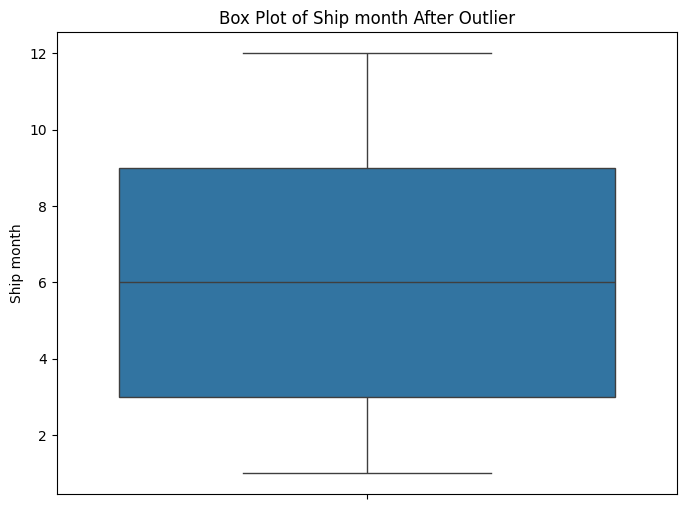

Before Outlier Removing:  Ship day


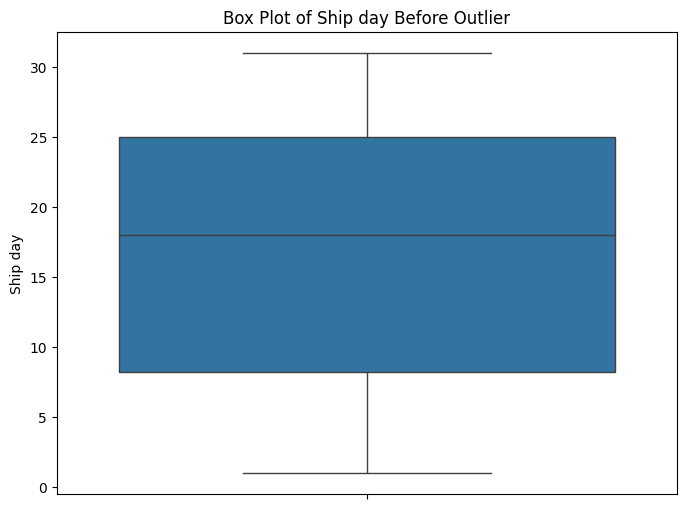

After Outlier Removing:  Ship day


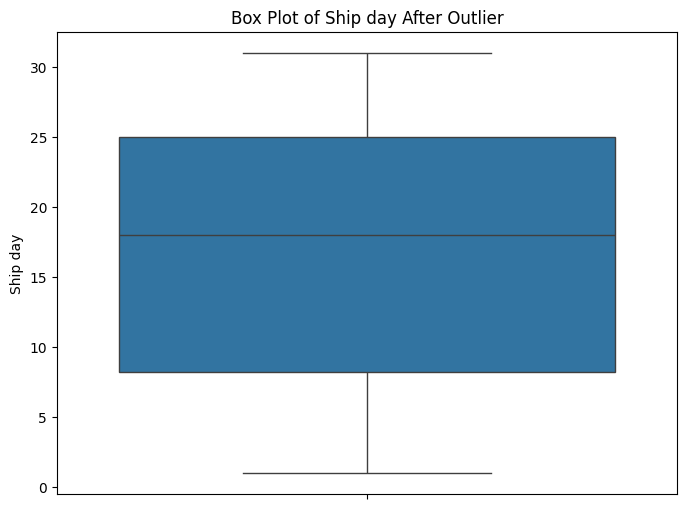

In [ ]:
for column in numerical_columns:

    print("Before Outlier Removing: ",column)

    boxplot('Before Outlier',column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data = data.loc[(data[column] > lower_bound) & (data[column] < upper_bound)]

    boxplot('After Outlier',column)



In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order month,Order day,Order Year-Month,Ship year,Ship month,Ship day
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,2010-05,2010,6,27
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,2012-08,2012,9,15
2,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2014-05,2014,5,8
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,2014-06,2014,7,5
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,2013-02,2013,2,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   Region            90 non-null     object   
 1   Country           90 non-null     object   
 2   Item Type         90 non-null     object   
 3   Sales Channel     90 non-null     object   
 4   Order Priority    90 non-null     object   
 5   Order ID          90 non-null     int64    
 6   Units Sold        90 non-null     int64    
 7   Unit Price        90 non-null     float64  
 8   Unit Cost         90 non-null     float64  
 9   Total Revenue     90 non-null     float64  
 10  Total Cost        90 non-null     float64  
 11  Total Profit      90 non-null     float64  
 12  Order year        90 non-null     int32    
 13  Order month       90 non-null     int32    
 14  Order day         90 non-null     int32    
 15  Order Year-Month  90 non-null     period[M]
 16  Ship year      

## **DATA VISUALIZATION**

**Monthly Sales Trend**


Text(0, 0.5, 'Total Sales')

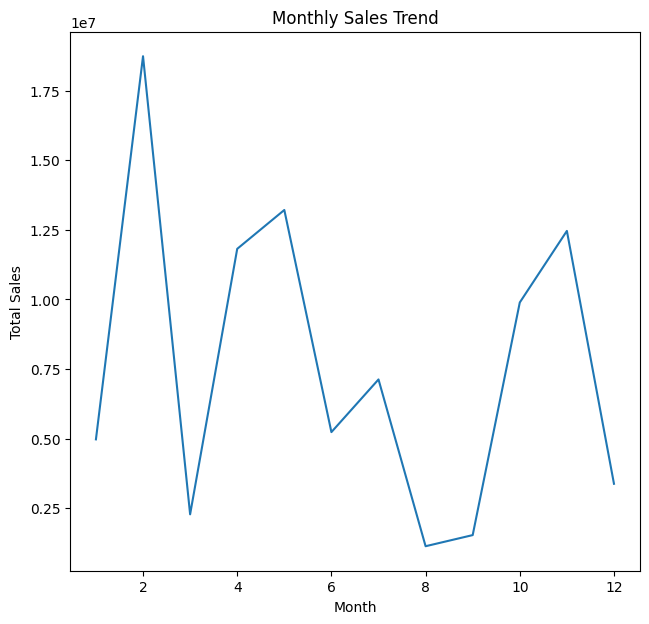

In [ ]:
# Group by different time frames and calculate the sum of total sales
monthly_sales = data.groupby('Order month')['Total Revenue'].sum()

# Plotting the trends
plt.figure(figsize=(25, 7))

# Monthly Sales Trend
plt.subplot(1, 3, 1)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')


**Yearly Sales Trend**

Text(0, 0.5, 'Total Sales')

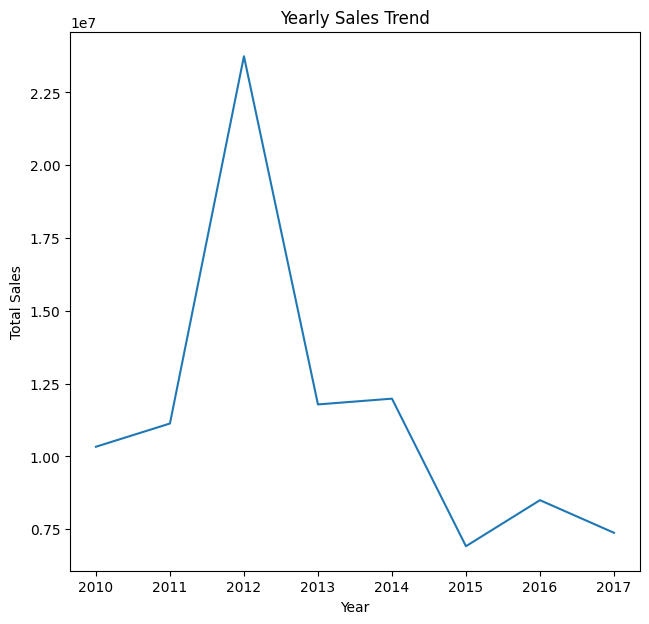

In [ ]:
yearly_sales = data.groupby('Order year')['Total Revenue'].sum()

plt.figure(figsize=(25, 7))

# Yearly Sales Trend
plt.subplot(1, 3, 2)
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')

**Yearly-Monthly Sales Trend**

Text(0, 0.5, 'Total Sales')

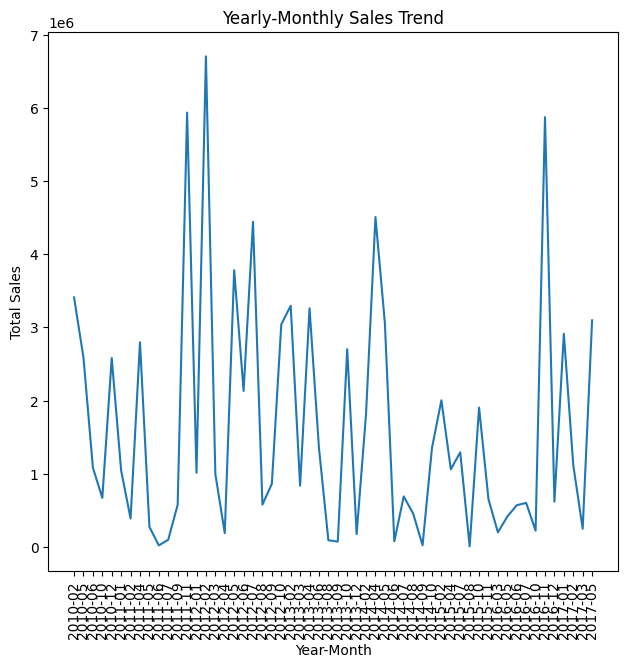

In [ ]:
yearly_monthly_sales = data.groupby('Order Year-Month')['Total Revenue'].sum()

plt.figure(figsize=(25, 7))

# Yearly-Monthly Sales Trend
plt.subplot(1, 3, 3)
sns.lineplot(x=yearly_monthly_sales.index.astype(str), y=yearly_monthly_sales.values)
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')

**Correlation Matrix**

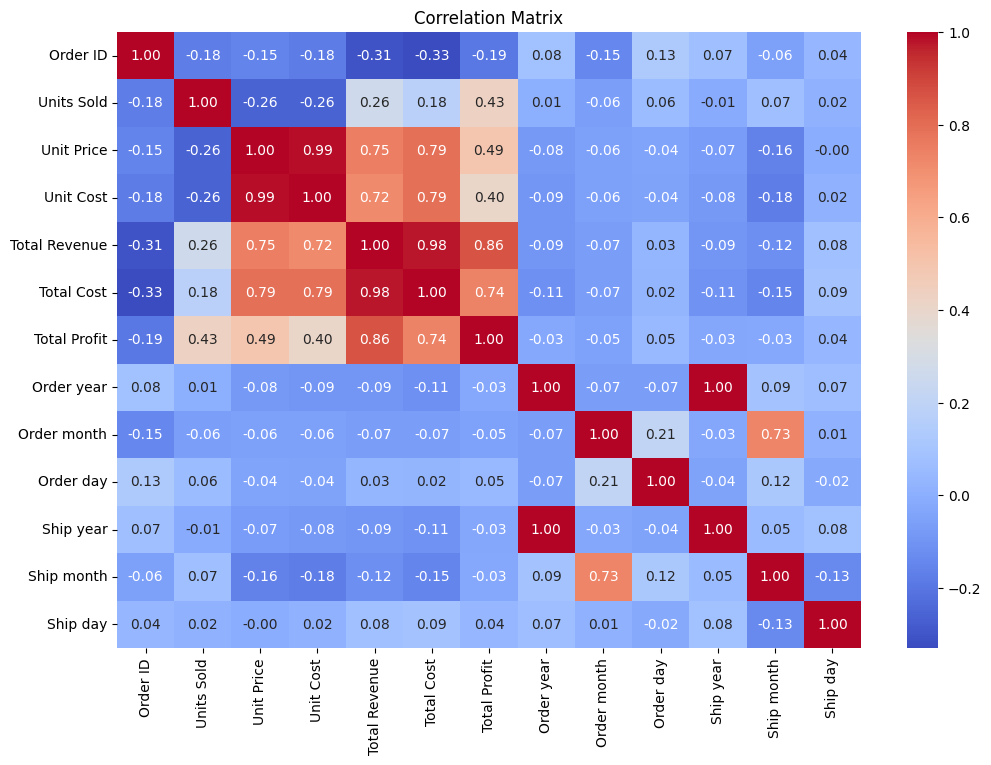

In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Units Sold Vs Total Profit**

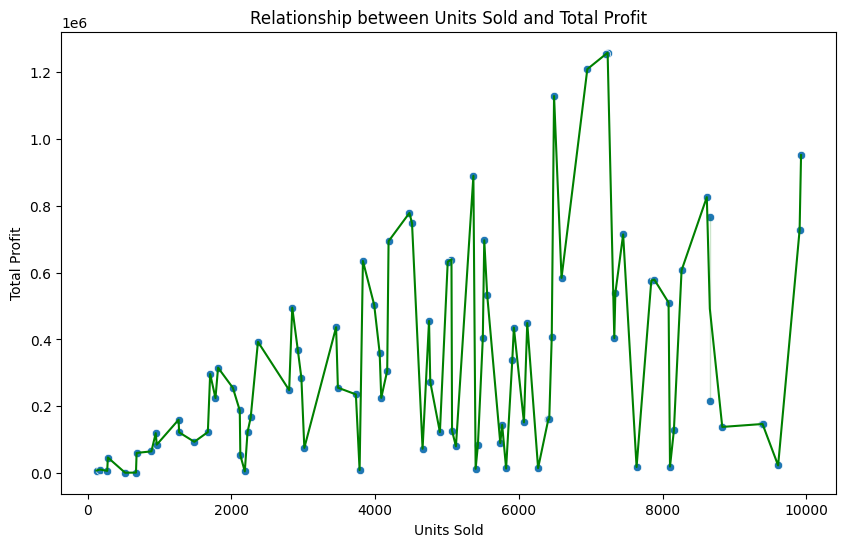

In [ ]:
# Scatter plot to show relationship between Units Sold and Total Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Total Profit', data=data)
sns.lineplot(x='Units Sold', y='Total Profit', data=data,color='green')
plt.title('Relationship between Units Sold and Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.show()

**Units Sold Vs Total Revenue**

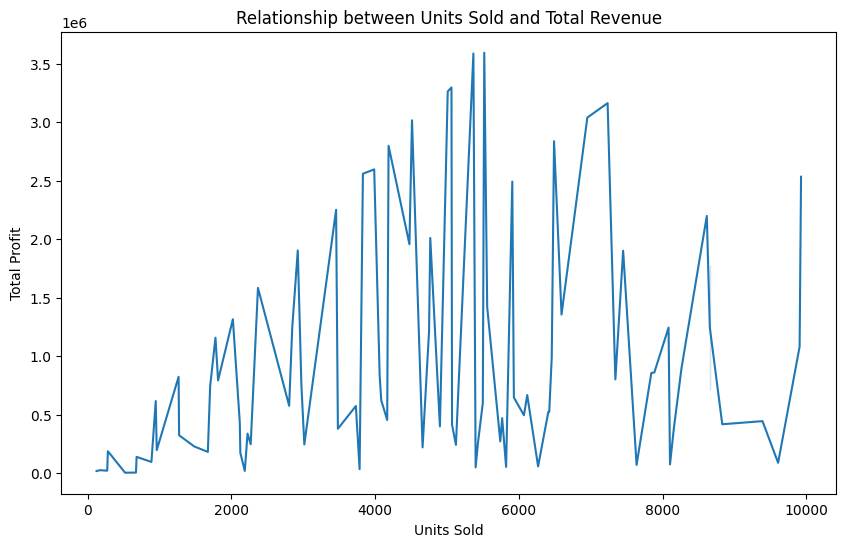

In [ ]:
# Scatter plot to show relationship between Units Sold and Total sales

plt.figure(figsize=(10, 6))
sns.lineplot(x='Units Sold', y='Total Revenue', data=data)
plt.title('Relationship between Units Sold and Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.show()

**Total Sales Vs Total Profit**

Text(0, 0.5, 'Total Profit')

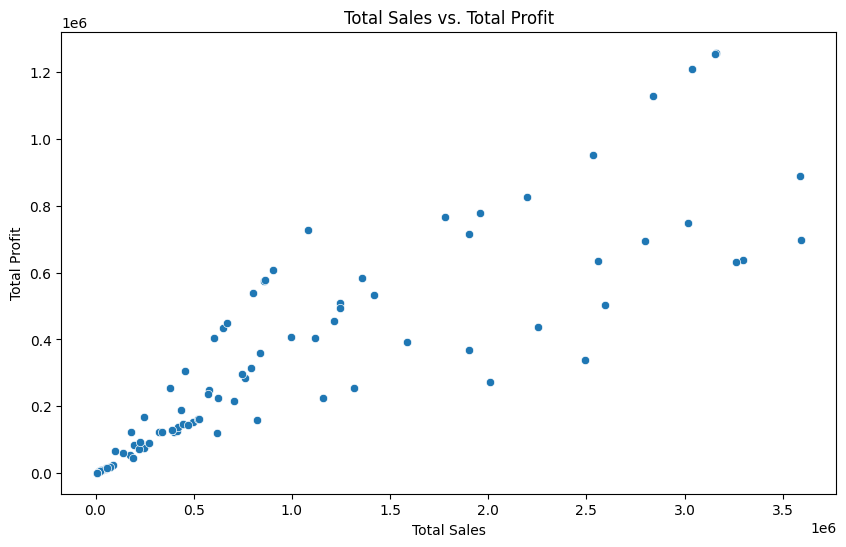

In [ ]:
# Total Sales vs. Total Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Revenue', y='Total Profit', data=data)
plt.title('Total Sales vs. Total Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')

**Total Sales by Country**

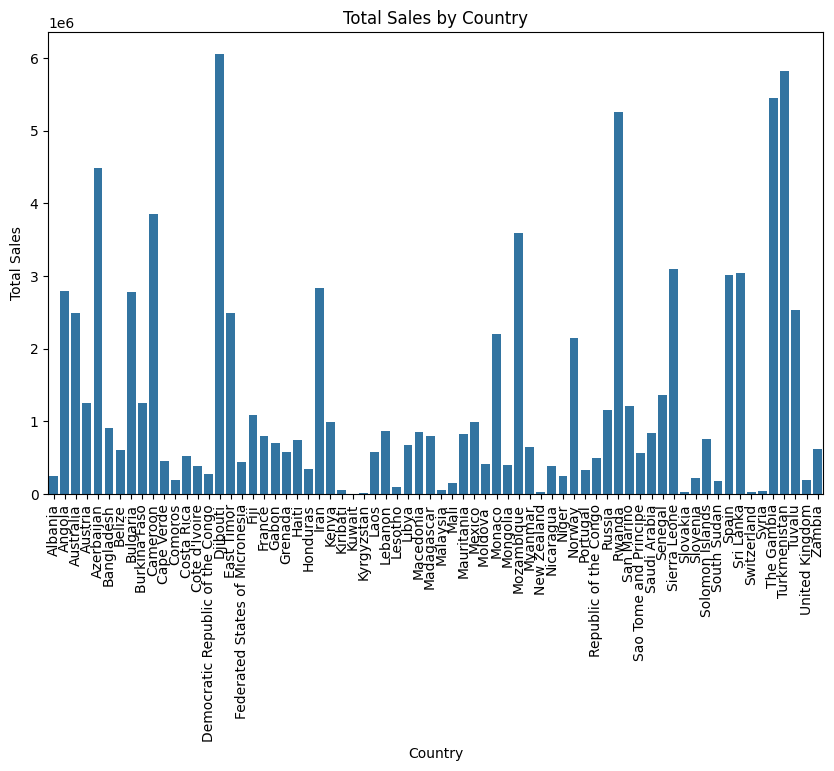

In [ ]:
country_sales = data.groupby('Country')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

**Channel VS Total Sales**

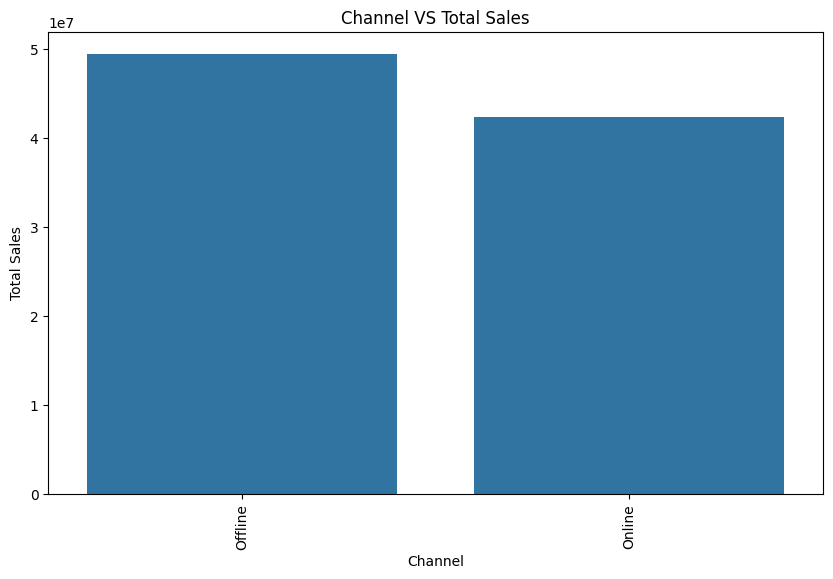

In [ ]:
channel_revenue = data.groupby('Sales Channel')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=channel_revenue.index, y=channel_revenue.values)
plt.title('Channel VS Total Sales')
plt.xlabel('Channel')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

## **FEATURE ENGINEERING**

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

**LabelEncoder**

In [ ]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

Region
Country
Item Type
Sales Channel
Order Priority
Order Year-Month


In [ ]:
encoding_mapping

{'Region': {'Asia': 0,
  'Australia and Oceania': 1,
  'Central America and the Caribbean': 2,
  'Europe': 3,
  'Middle East and North Africa': 4,
  'North America': 5,
  'Sub-Saharan Africa': 6},
 'Country': {'Albania': 0,
  'Angola': 1,
  'Australia': 2,
  'Austria': 3,
  'Azerbaijan': 4,
  'Bangladesh': 5,
  'Belize': 6,
  'Bulgaria': 7,
  'Burkina Faso': 8,
  'Cameroon': 9,
  'Cape Verde': 10,
  'Comoros': 11,
  'Costa Rica': 12,
  "Cote d'Ivoire": 13,
  'Democratic Republic of the Congo': 14,
  'Djibouti': 15,
  'East Timor': 16,
  'Federated States of Micronesia': 17,
  'Fiji': 18,
  'France': 19,
  'Gabon': 20,
  'Grenada': 21,
  'Haiti': 22,
  'Honduras': 23,
  'Iran': 24,
  'Kenya': 25,
  'Kiribati': 26,
  'Kuwait': 27,
  'Kyrgyzstan': 28,
  'Laos': 29,
  'Lebanon': 30,
  'Lesotho': 31,
  'Libya': 32,
  'Macedonia': 33,
  'Madagascar': 34,
  'Malaysia': 35,
  'Mali': 36,
  'Mauritania': 37,
  'Mexico': 38,
  'Moldova ': 39,
  'Monaco': 40,
  'Mongolia': 41,
  'Mozambique': 42,

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order month,Order day,Order Year-Month,Ship year,Ship month,Ship day
0,1,67,0,0,1,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,1,2010,6,27
1,2,21,2,1,0,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,20,2012,9,15
2,3,50,8,0,2,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,33,2014,5,8
3,6,53,5,1,0,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,34,2014,7,5
4,6,51,8,0,2,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,23,2013,2,6


### **MODEL SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Prepare the data for modeling
X = data.drop(['Total Revenue'], axis=1)
y = data['Total Revenue']

**Standard Scaler**

In [ ]:
X = scalerx.fit_transform(X)

In [ ]:

# Convert the y to a NumPy array
y_array = y.values

# Reshape the NumPy array to a 2D array with one column
y_reshaped = y_array.reshape(-1, 1)

# Use the reshaped array for fitting and transforming
y = scalery.fit_transform(y_reshaped)


In [ ]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order year,Order month,Order day,Order Year-Month,Ship year,Ship month,Ship day
0,1,67,0,0,1,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,28,1,2010,6,27
1,2,21,2,1,0,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,22,20,2012,9,15
2,3,50,8,0,2,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,33,2014,5,8
3,6,53,5,1,0,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,20,34,2014,7,5
4,6,51,8,0,2,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,23,2013,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,36,3,1,3,512878119,888,109.28,35.84,97040.64,31825.92,65214.72,2011,7,26,10,2011,9,3
96,0,35,5,0,2,810711038,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11,11,12,2011,12,28
97,6,56,11,0,0,728815257,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,6,1,47,2016,6,29
98,5,38,9,0,3,559427106,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,7,30,41,2015,8,8


In [ ]:
X

array([[-1.2807348 ,  1.52440461, -1.54545455, ..., -1.62085465,
        -0.10406518,  1.15215866],
       [-0.81595201, -0.66844983, -0.93939394, ..., -0.63185859,
         0.77398476, -0.17867701],
       [-0.35116922,  0.71400188,  0.87878788, ...,  0.35713747,
        -0.39674849, -0.95499782],
       ...,
       [ 1.04317915,  1.00002637,  1.78787879, ...,  1.34613353,
        -0.10406518,  1.3739646 ],
       [ 0.57839636,  0.1419529 ,  1.18181818, ...,  0.8516355 ,
         0.48130145, -0.95499782],
       [ 1.04317915,  0.33263589,  0.27272727, ..., -0.63185859,
        -1.27479843, -0.17867701]])

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [ ]:
# Initialize the models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
y_linear_pred = linear_model.predict(X_test)


In [ ]:
y_linear_pred

array([[-0.36721069],
       [-0.98755831],
       [-0.8690658 ],
       [ 1.16575567],
       [ 1.49654682],
       [-0.95403704],
       [-0.98168763],
       [-1.00152012],
       [-0.98884449],
       [-0.19285482],
       [-0.3975382 ],
       [ 1.55853977],
       [ 0.19079227],
       [-0.94993333],
       [-0.11521691],
       [ 2.25047259],
       [ 1.45589587],
       [ 0.55770743]])

In [ ]:
# Evaluate the models
mse_lr = mean_squared_error(y_test, y_linear_pred)

r2_lr = r2_score(y_test, y_linear_pred)

# Display the results
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 6.236268156033891e-31, R2: 1.0


**Residual Plot**

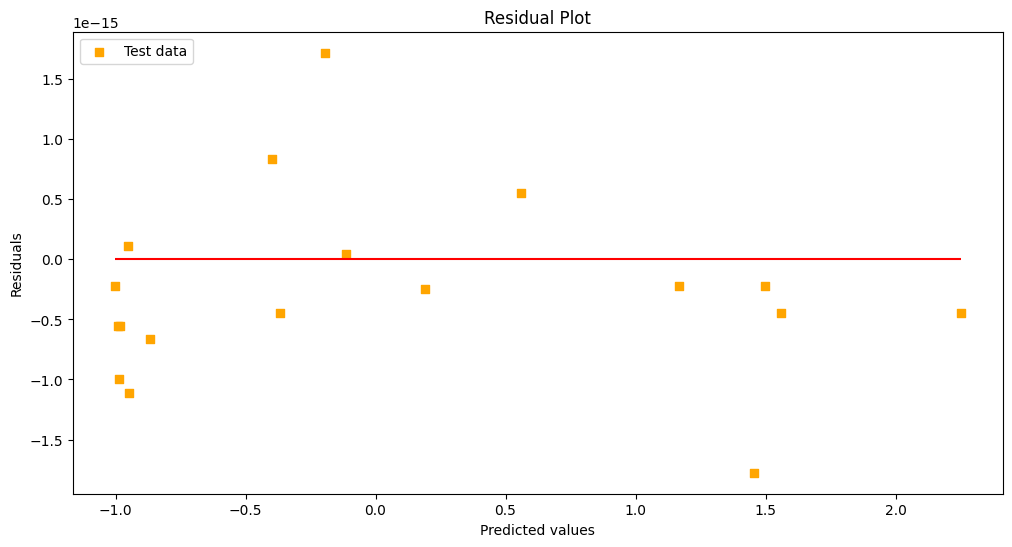

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_linear_pred, y_linear_pred - y_test, c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_linear_pred.min(), xmax=y_linear_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

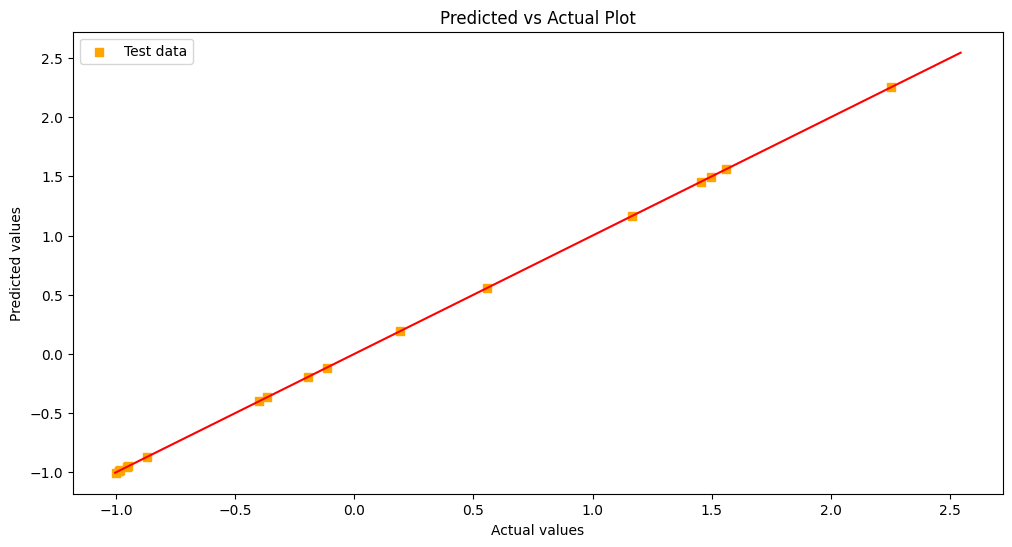

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_linear_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Decision Tree Regressor**

In [ ]:
decision_model = DecisionTreeRegressor()

decision_model.fit(X_train, y_train)

y_decision_pred = decision_model.predict(X_test)

In [ ]:
y_decision_pred

array([-0.34712032, -0.95794708, -0.78160027,  1.2174008 ,  1.2174008 ,
       -0.91181106, -0.97283108, -0.98567285, -0.97283108, -0.51737819,
       -0.59816043,  2.11830302,  0.29310729, -0.98567285,  0.06214005,
        2.53728767,  1.52206751,  1.2174008 ])

In [ ]:
y_decision_pred= y_decision_pred.reshape(-1,1)

In [ ]:
mse_dt = mean_squared_error(y_test, y_decision_pred)

r2_dt = r2_score(y_test, y_decision_pred)


print(f'Decision Tree - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree - MSE: 0.06199039463589103, R2: 0.9451637063941805


**Residual PLot**

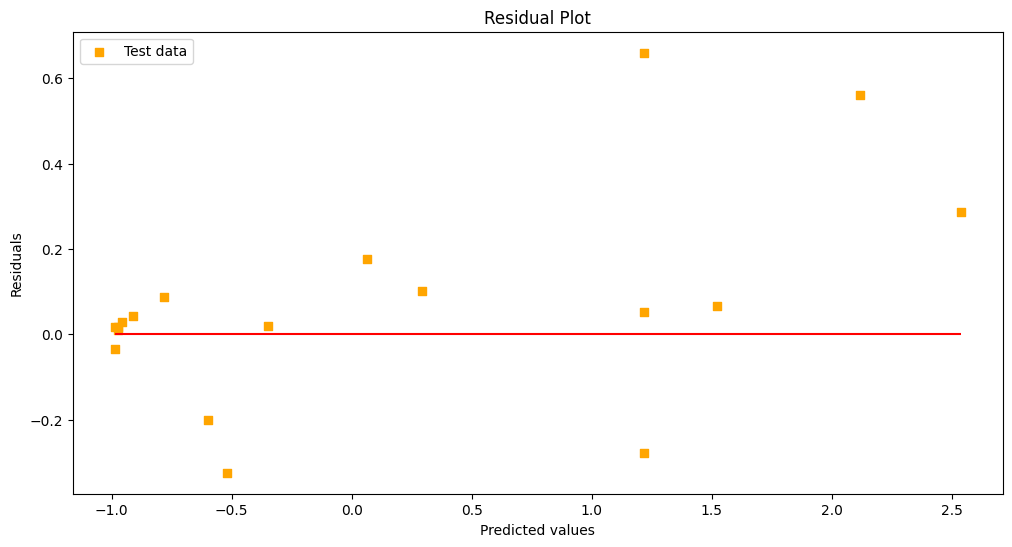

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_decision_pred,(y_decision_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_decision_pred.min(), xmax=y_decision_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

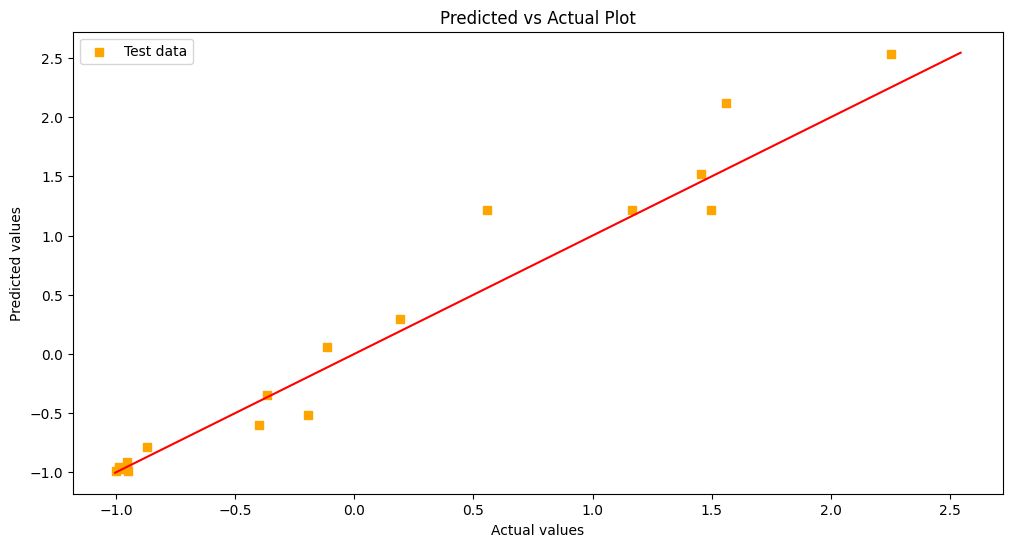

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_decision_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Random Forest Regressor**

In [ ]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
y_random_pred

array([-0.3422787 , -0.96033119, -0.83720066,  1.08721373,  1.27253507,
       -0.94285854, -0.96020027, -0.95752337, -0.95521159, -0.20915356,
       -0.50589676,  1.82913922,  0.26015168, -0.95185174, -0.2122782 ,
        2.28357422,  1.99566798,  0.9412371 ])

In [ ]:
y_random_pred = y_random_pred.reshape(-1,1)

In [ ]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.033410734249845406, R2: 0.9704450851834103


**Residual Plot**

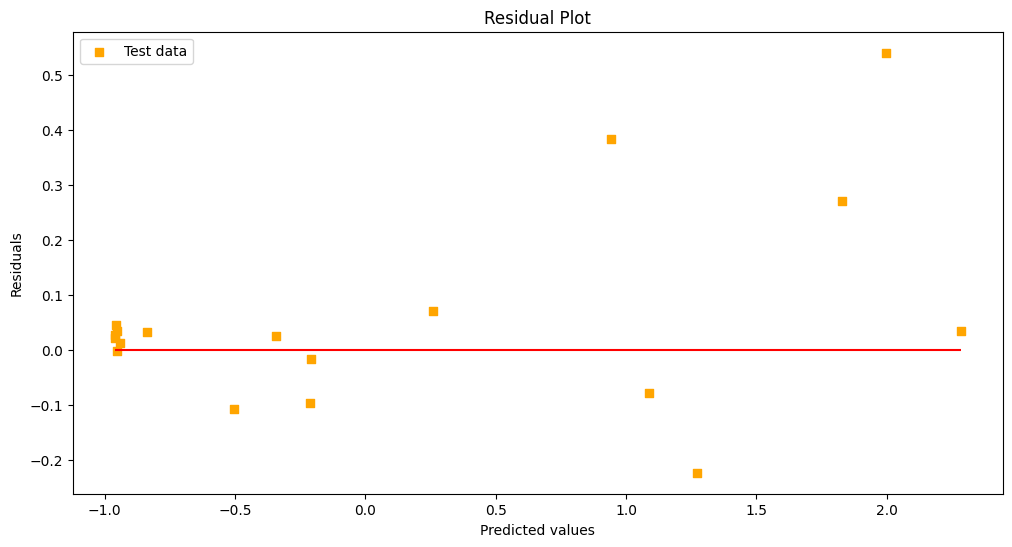

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_random_pred,(y_random_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_random_pred.min(), xmax=y_random_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

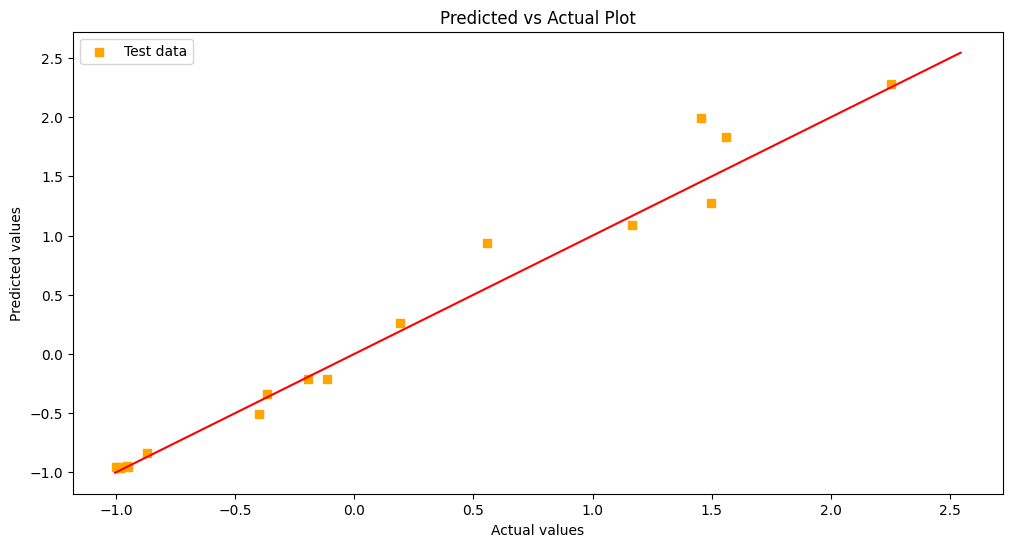

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_random_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Support Vector Regression (SVR)**

In [ ]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

y_svr_pred = svr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_svr_pred

array([-0.34875942, -1.0870957 , -0.92890902,  1.1565213 ,  1.46505898,
       -0.98618151, -1.13319201, -1.16489367, -1.11278631, -0.09690781,
       -0.26625545,  1.57092904,  0.17282065, -0.99683933, -0.01710802,
        2.18456293,  1.36735994,  0.62694424])

In [ ]:
y_svr_pred = y_svr_pred.reshape(-1,1)

In [ ]:
mse_svr = mean_squared_error(y_test, y_svr_pred)

r2_svr = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_svr}, R2: {r2_svr}')

Random Forest - MSE: 0.00759249267300575, R2: 0.9704450851834103


**Residual Plot**

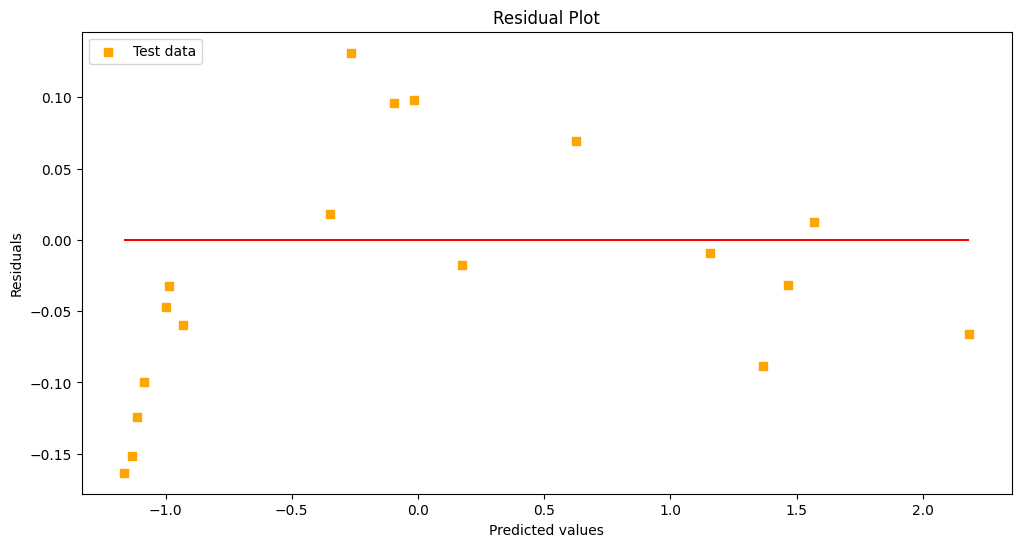

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_svr_pred,(y_svr_pred - y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_svr_pred.min(), xmax=y_svr_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

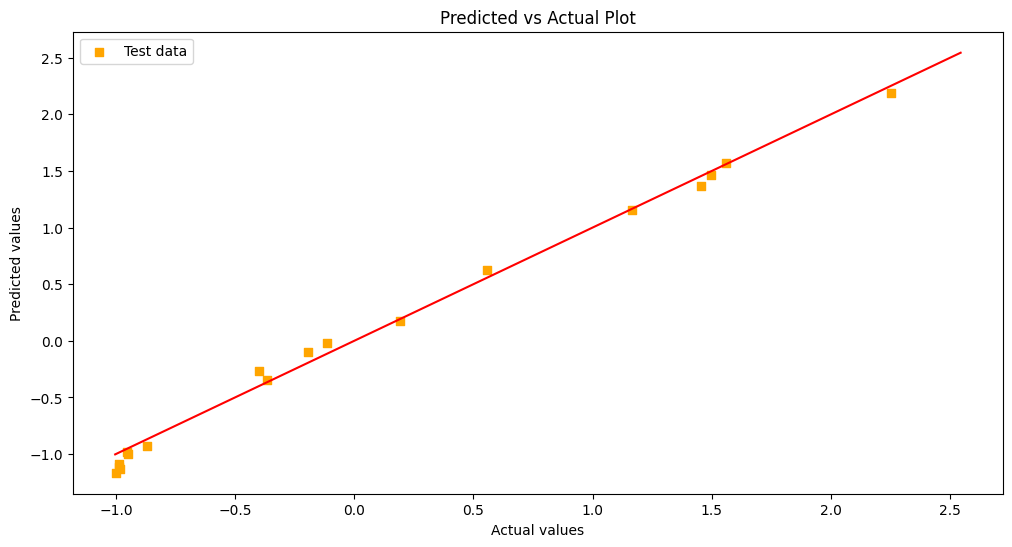

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_svr_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**LSTM**

In [ ]:
# Split the data into training and testing sets
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
# Reshape the data to fit the LSTM model requirements
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 9])  # 'Total Revenue' is the target variable
    return np.array(X), np.array(Y)

In [ ]:
look_back =  3
lstm_X_train, lstm_y_train = create_dataset(train_data, look_back)
lstm_X_test, lstm_y_test = create_dataset(test_data, look_back)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, len(data.columns))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(lstm_X_train, lstm_y_train, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
68/68 - 3s - loss: 1.1171 - 3s/epoch - 43ms/step
Epoch 2/150
68/68 - 0s - loss: 0.8756 - 393ms/epoch - 6ms/step
Epoch 3/150
68/68 - 0s - loss: 0.6924 - 393ms/epoch - 6ms/step
Epoch 4/150
68/68 - 0s - loss: 0.5224 - 442ms/epoch - 7ms/step
Epoch 5/150
68/68 - 0s - loss: 0.4065 - 440ms/epoch - 6ms/step
Epoch 6/150
68/68 - 0s - loss: 0.3108 - 260ms/epoch - 4ms/step
Epoch 7/150
68/68 - 0s - loss: 0.1965 - 276ms/epoch - 4ms/step
Epoch 8/150
68/68 - 0s - loss: 0.1250 - 239ms/epoch - 4ms/step
Epoch 9/150
68/68 - 0s - loss: 0.0967 - 248ms/epoch - 4ms/step
Epoch 10/150
68/68 - 0s - loss: 0.0580 - 233ms/epoch - 3ms/step
Epoch 11/150
68/68 - 0s - loss: 0.0374 - 240ms/epoch - 4ms/step
Epoch 12/150
68/68 - 0s - loss: 0.0232 - 237ms/epoch - 3ms/step
Epoch 13/150
68/68 - 0s - loss: 0.0143 - 237ms/epoch - 3ms/step
Epoch 14/150
68/68 - 0s - loss: 0.0084 - 236ms/epoch - 3ms/step
Epoch 15/150
68/68 - 0s - loss: 0.0041 - 241ms/epoch - 4ms/step
Epoch 16/150
68/68 - 0s - loss: 0.0036 - 260ms/epoc

In [ ]:
# Make predictions
y_lstm_pred = model.predict(lstm_X_test)

1/1 [==============================] - 1s 550ms/step


In [ ]:
y_lstm_pred

array([[ 0.3454543 ],
       [ 0.20835517],
       [-0.10291117],
       [ 0.16825359],
       [ 0.32235557],
       [ 0.65940106],
       [ 0.42303926],
       [-0.32518655],
       [-0.3651145 ],
       [-0.522607  ],
       [ 0.8684567 ],
       [ 0.42921206],
       [ 0.21799108],
       [ 0.37678924]], dtype=float32)

In [ ]:
lstm_y_test = lstm_y_test.reshape(-1,1)

In [ ]:
# Calculate evaluation metrics
lstm_mse = mean_squared_error(lstm_y_test, y_lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(lstm_y_test, y_lstm_pred)


In [ ]:
print(f'Train MSE: {lstm_mse:.2f}')
print(f'Train RMSE: {lstm_rmse:.2f}')
print(f'Train R2: {lstm_r2:.2f}')

Train MSE: 0.92
Train RMSE: 0.96
Train R2: -4.17


**Residual Plot**

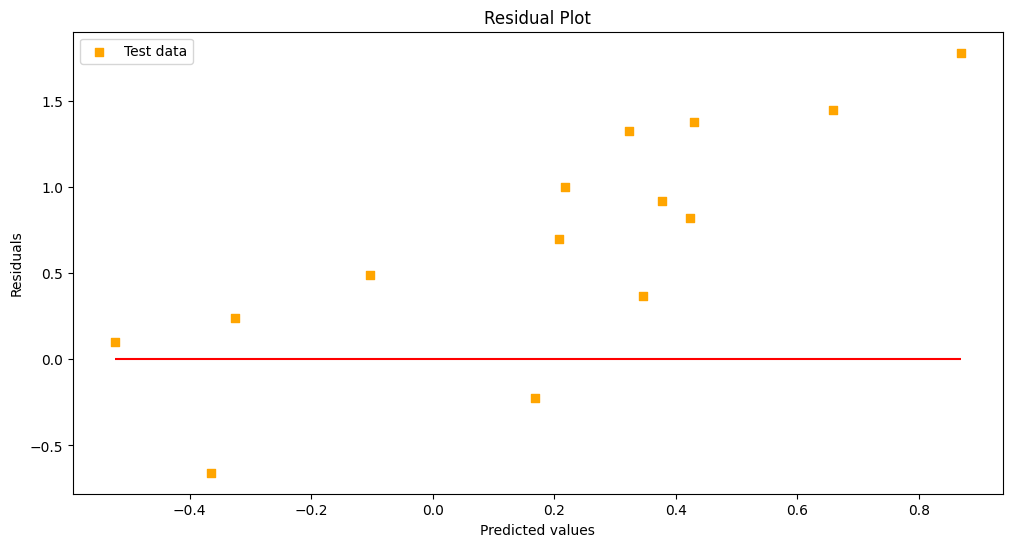

In [ ]:
# Residual plot
plt.figure(figsize=(12, 6))
plt.scatter(y_lstm_pred,(y_lstm_pred - lstm_y_test), c='orange', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_lstm_pred.min(), xmax=y_lstm_pred.max(), color='red')
plt.title('Residual Plot')
plt.show()

**Predicted vs Actual plot**

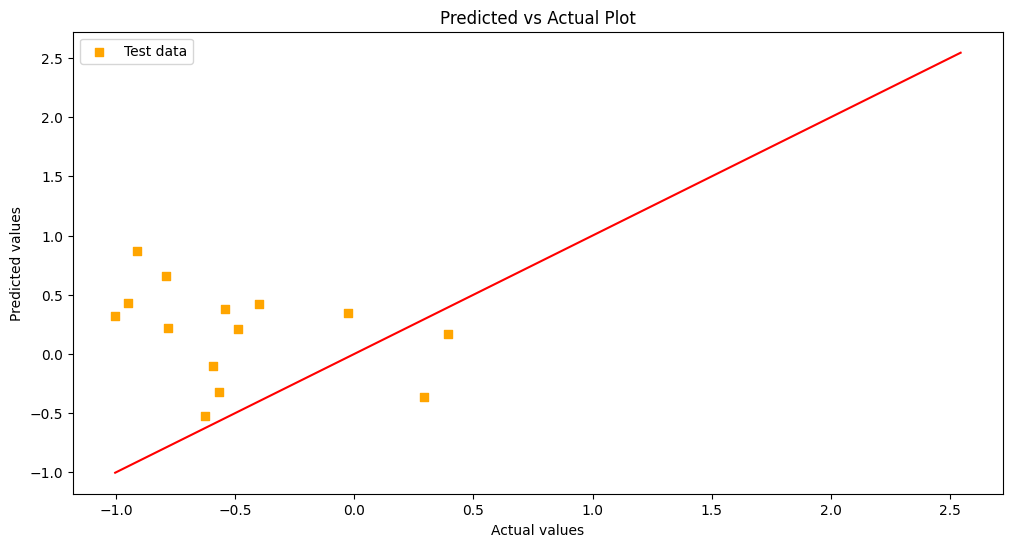

In [ ]:
# Predicted vs Actual plot
plt.figure(figsize=(12, 6))
plt.scatter(lstm_y_test, y_lstm_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()

**Comaprison of Models**

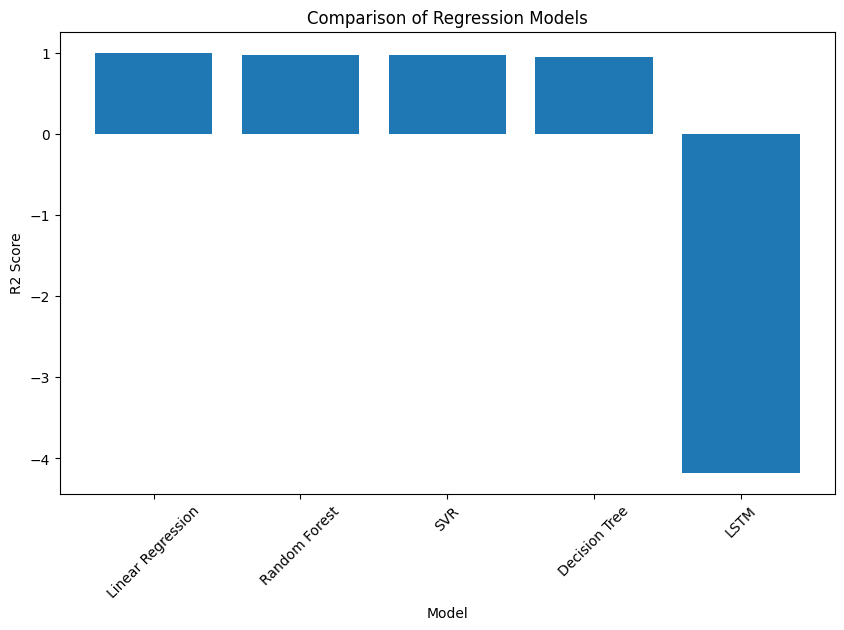

In [ ]:

# Create a dictionary to store model names and their MSE values
models_r2 = {
    "Linear Regression": r2_lr,
    "Decision Tree": r2_dt,
    "Random Forest": r2_rf,
    "LSTM" : lstm_r2,
    "SVR": r2_svr


}

# Sort models by descending order of accuracy
sorted_models_r2 = dict(sorted(models_r2.items(), key=lambda item: item[1],reverse = True))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(sorted_models_r2.keys(), sorted_models_r2.values())
plt.title('Comparison of Regression Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            90 non-null     int64  
 1   Country           90 non-null     int64  
 2   Item Type         90 non-null     int64  
 3   Sales Channel     90 non-null     int64  
 4   Order Priority    90 non-null     int64  
 5   Order ID          90 non-null     int64  
 6   Units Sold        90 non-null     int64  
 7   Unit Price        90 non-null     float64
 8   Unit Cost         90 non-null     float64
 9   Total Revenue     90 non-null     float64
 10  Total Cost        90 non-null     float64
 11  Total Profit      90 non-null     float64
 12  Order year        90 non-null     int32  
 13  Order month       90 non-null     int32  
 14  Order day         90 non-null     int32  
 15  Order Year-Month  90 non-null     int64  
 16  Ship year         90 non-null     int32  
 17  Ship